In [12]:
import numpy as np

In [42]:
def compute_distances_two_loops(X, X_train ):
    
        """
        Compute the distance between each test point in X and each training point
        in X_train using a nested loop over both the training data and the
        test data.

        Inputs:
        - X: A numpy array of shape (num_test, D) containing test data.

        Returns:
        - dists: A numpy array of shape (num_test, num_train) where dists[i, j]
          is the Euclidean distance between the ith test point and the jth training
          point.
        """
        num_test = X.shape[0]

        num_train = X_train.shape[0]
        dists = np.zeros((num_test, num_train))
        for i in range(num_test):
            for j in range(num_train):
                #####################################################################
                # TODO:                                                             #
                # Compute the l2 distance between the ith test point and the jth    #
                # training point, and store the result in dists[i, j]. You should   #
                # not use a loop over dimension, nor use np.linalg.norm().          #
                #####################################################################
                # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
                l=X_train[j,:]-X[i,:]
                dists[i,j] =np.sqrt(np.sum(l**2)) 
                # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        return dists


In [43]:
def compute_distances_one_loop(X, X_train):
        """
        Compute the distance between each test point in X and each training point
        in X_train using a single loop over the test data.

        Input / Output: Same as compute_distances_two_loops
        """
        num_test = X.shape[0]
        num_train =X_train.shape[0]
        dists = np.zeros((num_test, num_train))
        for i in range(num_test):
            #######################################################################
            # TODO:                                                               #
            # Compute the l2 distance between the ith test point and all training #
            # points, and store the result in dists[i, :].                        #
            # Do not use np.linalg.norm().                                        #
            #######################################################################
            # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
            l=X_train - X[i, :]
            dists[i, :] = np.sqrt(np.sum(np.square(l), axis=1))
            # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        return dists

In [44]:
def compute_distances_no_loops(X, X_train):
        """
        Compute the distance between each test point in X and each training point
        in X_train using no explicit loops.

        Input / Output: Same as compute_distances_two_loops
        """
        num_test = X.shape[0]
        num_train = X_train.shape[0]
        dists = np.zeros((num_test, num_train))
        #########################################################################
        # TODO:                                                                 #
        # Compute the l2 distance between all test points and all training      #
        # points without using any explicit loops, and store the result in      #
        # dists.                                                                #
        #                                                                       #
        # You should implement this function using only basic array operations; #
        # in particular you should not use functions from scipy,                #
        # nor use np.linalg.norm().                                             #
        #                                                                       #
        # HINT: Try to formulate the l2 distance using matrix multiplication    #
        #       and two broadcast sums.                                         #
        #########################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        X_power2 = np.sum(X**2, axis=1, keepdims=True)
        X_train_power2 = np.sum(X_train**2, axis=1, keepdims=True)
        dists= np.sqrt( X_power2 -2 *np.dot(X,(X_train.T)) + X_train_power2.T)
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        return dists

In [45]:


 # *************** NO CHANGES HERE *************************************

def predict_labels(dists,y_train, k):
        """
        Given a matrix of distances between test points and training points,
        predict a label for each test point.

        Inputs:
        - dists: A numpy array of shape (num_test, num_train) where dists[i, j]
          gives the distance betwen the ith test point and the jth training point.

        Returns:
        - y: A numpy array of shape (num_test,) containing predicted labels for the
          test data, where y[i] is the predicted label for the test point X[i].
        """
        num_test = dists.shape[0]
        y_pred = np.zeros(num_test)

        for i in range(num_test):
            # A list of length k storing the labels of the k nearest neighbors to
            # the ith test point.
            closest_y = []
            #########################################################################
            # TODO:                                                                 #
            # Use the distance matrix to find the k nearest neighbors of the ith    #
            # testing point, and use y_train to find the labels of these       #
            # neighbors. Store these labels in closest_y.                           #
            # Hint: Look up the function numpy.argsort.                             #
            #########################################################################
            # *****START OF YOUR CODE *****
            ## sort by index
            index_sort = np.argsort(dists[i])
            
            ## y values of k nearest neighbors
            closest_y = y_train[index_sort][:k]
          
            # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
            #########################################################################
            # TODO:                                                                 #
            # Now that you have found the labels of the k nearest neighbors, you    #
            # need to find the most common label in the list closest_y of labels.   #
            # Store this label in y_pred[i]. Break ties by choosing the smaller     #
            # label.                                                                #
            #########################################################################
            # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
            occurances = np.bincount(closest_y)
            y_pred[i] = np.argmax(occurances)

            # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        return y_pred

**hints**

In [6]:
x = np.array([1,9,3,3,2, 6, 6])
np.argsort(x)

array([0, 4, 2, 3, 5, 6, 1])

In [7]:
x[[1,4, 3]]

array([9, 2, 3])

In [8]:
occurances = np.bincount(x)
occurances


array([0, 1, 1, 2, 0, 0, 2, 0, 0, 1])

In [9]:
np.argmax(occurances)

3

#**MNIST**

**read Train and Test**

In [46]:
#directory = './Train/'
directory=r'C:/Users/Hadeel/Desktop/Python_For_DataScience_MasterClass/Assignment 3/Train/'
#test_directory = './Test/'
test_directory=r'C:/Users/Hadeel/Desktop/Python_For_DataScience_MasterClass/Assignment 3/Test/'
import os 
import skimage
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt

In [47]:
MNIST_Train = np.array([imread(directory + str(i) + '.jpg').flatten() for i in range(1, 2400 +1)])
MNIST_Test = np.array([imread(test_directory + str(i) + '.jpg', 0).flatten() for i in range(1, 201)])
MNIST_Train.shape, MNIST_Test.shape

((2400, 784), (200, 784))

**normalize MNIST**

In [48]:
MNIST_Train.max(), MNIST_Train.min()

(255, 0)

In [49]:
MNIST_Train = MNIST_Train / 255.0
MNIST_Test  = MNIST_Test /255.0
MNIST_Train.max(), MNIST_Train.min()

(1.0, 0.0)

In [50]:
# the mean of the training data
mean = np.mean(MNIST_Train, axis = 0)
MNIST_Train = MNIST_Train -  mean
MNIST_Test = MNIST_Test -  mean

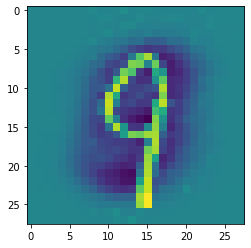

In [51]:
plt.imshow(MNIST_Train[-1].reshape(28,28))

**train and test labels**

In [52]:
MNIST_train_labels = np.repeat(np.arange(0,10) , 240)
MNIST_train_labels

array([0, 0, 0, ..., 9, 9, 9])

In [53]:
MNIST_test_labels = np.loadtxt('./Test Labels.txt')
MNIST_test_labels.shape

(200,)

**KNN**

In [54]:
MNIST_distances = compute_distances_no_loops(MNIST_Test, MNIST_Train)
MNIST_distances.shape

(200, 2400)

In [55]:
# Let's compare how fast the implementations are
def time_function(f, *args):
    """
    Call a function f with args and return the time (in seconds) that it took to execute.
    """
    import time
    tic = time.time()
    f(*args)
    toc = time.time()
    return toc - tic

no_loop_time = time_function(compute_distances_no_loops, MNIST_Test, MNIST_Train)
print('No loop version took %f seconds' % no_loop_time)

one_loop_time = time_function(compute_distances_one_loop, MNIST_Test, MNIST_Train)
print('One loop version took %f seconds' % one_loop_time)

two_loop_time = time_function(compute_distances_two_loops, MNIST_Test, MNIST_Train)
print('Two loop version took %f seconds' % two_loop_time)




# You should see significantly faster performance with the fully vectorized implementation!

# NOTE: depending on what machine you're using, 
# you might not see a speedup when you go from two loops to one loop, 
# and might even see a slow-down.

No loop version took 0.037335 seconds
One loop version took 2.715059 seconds
Two loop version took 5.123302 seconds


In [56]:
MNIST_prediction = predict_labels(MNIST_distances,MNIST_train_labels, k=10)
MNIST_prediction.shape

(200,)

In [57]:
np.mean(MNIST_prediction == MNIST_test_labels) * 100

91.0